# Sistema Criptográfico de Chave Pública de Rabin

Michael Rabin, informático israelita, ficou conhecido pelo seu trabalho em criptografia relacionada com os números primos. Este esquema implementado por Rabin, foi o primeiro exemplo de um esquema de criptografia de chave-pública.

O objetivo chave de cada modelo criptográfico é provar que é muito difícil de ser quebrado tal como é muito difícil resolver um problema computacional, como é o caso da fatorização de inteiros.

## Modelo Criptográfico
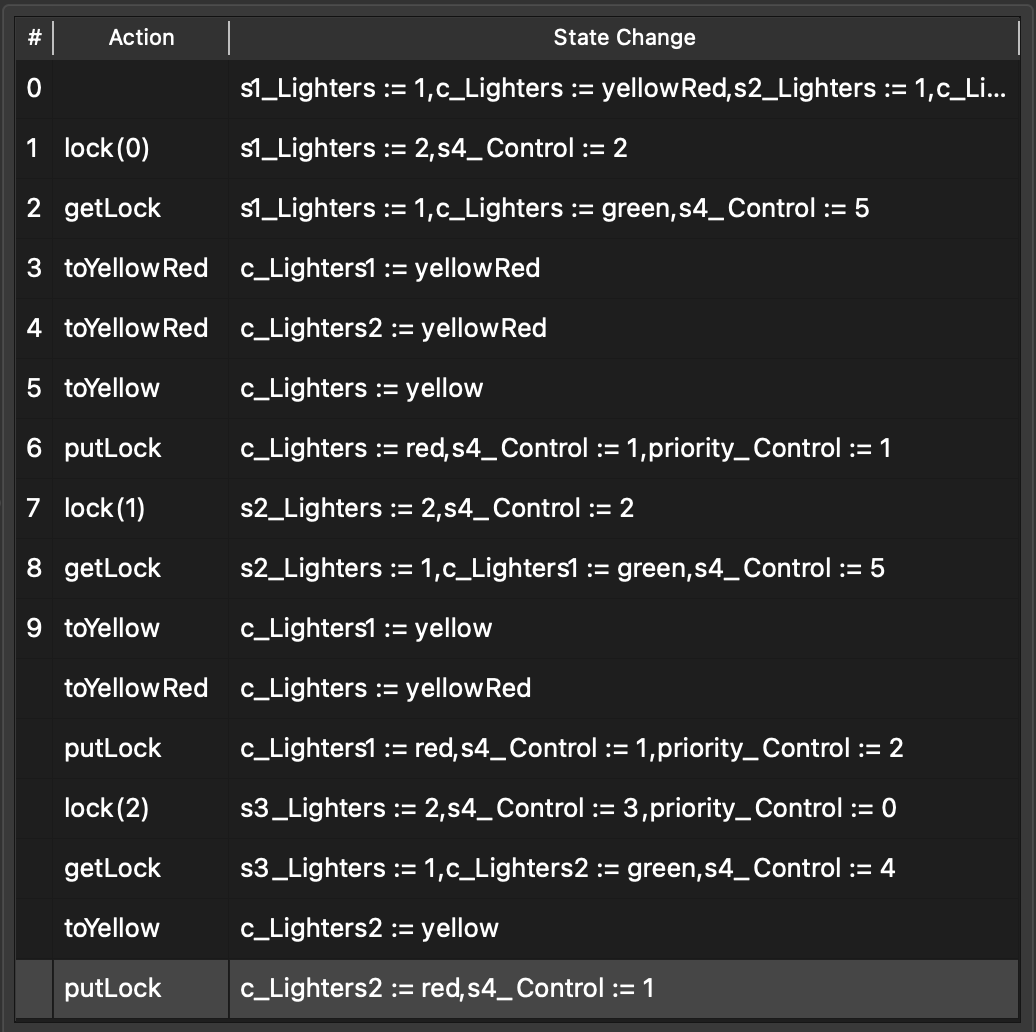

### Criação de uma Chave Pública e uma Chave Privada

Dado um número número de bits, são calculados, aleatoriamente, dois primos diferentes e, que dividindo por 4 dêem resto 3.
Posteriormente, é calculado uma $\textbf{chave pública}$ que é a multiplicação entre esses dois primos e uma $\textbf{chave privada}$ que é um tuplo que contém os primos calculados.

Sejam p e q primos,

$$p \equiv 3 (mod \:4)$$
$$p \equiv 3 (mod \:4)$$

In [2]:
def RSA(nbits):
    p = random_prime(2^(nbits//2),2^(nbits//2-1))
    while mod(p,4)!=3:
        p = random_prime(2^(nbits//2),2^(nbits//2-1))
    
    q = random_prime(2^(nbits//2),2^(nbits//2-1))
    while mod(q,4)!=3 and p != q:
        q = random_prime(2^(nbits//2),2^(nbits//2-1))
    
    public_key = p*q
    private_key = (p,q)
        
    return public_key, private_key

### Encriptação

O objetivo da função $\textit{encrypt}$ é encriptar uma determinada mensagem.

É passado como parâmetro da função uma $\textbf{mensagem}$ e uma $\textbf{chave pública}$. Num primeiro passo, a mensagem é convertida para $\textbf{binário}$ através de uma função auxiliar, $\textit{dec_to_bin}$. Após isso convertemos esse número de $\textbf{binário}$ para $\textbf{string}$ com o intuito de duplicar a mensagem. De seguida, foi implementada a função $\textit{binaryToDecimal}$ para converter a mensagem duplicada para $\textbf{binário}$. Assim, é retornada a mensagem encriptada através da fórmula: $$c = m^2 (mod\:n)$$

In [3]:
def binaryToDecimal(binary):
      
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return decimal

def dec_to_bin(x):
    return int(bin(x)[2:])
    
def encrypt(message,Pubkey):
    
    n = Pubkey
    
    binary = dec_to_bin(message)
    
    binary = str(binary)
    
    m = binary + binary
    
    m = binaryToDecimal(int(m))
    
    c = mod(pow(int(m),2),n)
    
    return c

### Desencriptação

Para decifrar a mensagem que foi encriptada, anteriormente, foi necessário pôr em prática alguns passos, isto é:

<ol> 
    <li> Calcular as 4 raízes quadradas da cifra gerada pela encriptação módulo n.</li> 
       <ul>
          <li>
        Foi usado o algoritmo estendido de Euclides para encontrar um inteiro $\textit{yp}$ e um inteiro $\textit{yq}$ de forma a que $$ yp * p + yq * q =  1$$
             Para isso foi usada a função $$xgcd(p,q)$$
           </li>
           <li>
               No próximo passo foi calculada a raíz quadrada modular para cada um dos primos <i>p</i> e <i>q</i> da seguinte forma: $$mp = \sqrt{cripto}\:(mod\:p)$$
               e, $$ mq = \sqrt{cripto}\:(mod\:q)$$
               onde <i>cripto</i> é a mensagem encriptada.
           </li>
           <li>
           De seguida convertem-se os valores obtidos anteriormente para inteiros e calcula-se as 4 possíveis raízes quadradas de <i>cripto</i> modulo <i>n</i>:</li>
           $$r = (yp * p * mq + yq * q * mp) (mod \:n)$$
$$s = (yp * p * mq - yq * q * mp) (mod \:n)$$
$$t = (-(yp * p * mq) + yq * q * mp) (mod \:n)$$
$$u = (-(yp * p * mq) - yq * q * mp) (mod \:n)$$
       </ul>
  <li>Verificar a redundância de cada raíz, isto é, verificar qual a raíz que tem a repetição da mesma palavra.</li>
      <ul>
          <li> Primeiramente, verificou-se quais eram as raízes que eram pares e acrescentou-se a uma lista pois numa raíz 
          impar é impossível ter uma repetição de uma mensagem, para isso foi criada uma função $\textit{is_odd}$.</li>
          <li>De seguida, foi criado uma função $\textit{equals}$ que dada lista de raízes pares, verifica qual delas é uma repetição de uma mensagem, as que não forem uma repetição, são eliminadas da lista, sobrando uma, que é a mensagem duplicada.</li>
    </ul>
    
  <li> Finalmente, retira-se a duplicação da mensagem e é imprimida a mensagem original que foi, inicialmente, encriptada.</li>

</ol>  



In [4]:
def is_odd(keysList):
    final = []
    
    for key in keysList:
        if len(str(key))%2 == 0:
            final.append(str(key))
    return final

def equals(keylist):
    keylist = is_odd(keylist)
    for key in keylist:
        if key[0:len(key)//2] != key[len(key)//2:]:
            keylist.remove(key)
    return keylist


def decrypt(cripto, pubKey, Priv_key):

    p,q = Priv_key
    
    n = pubKey

    a, yp, yq = xgcd(p,q)
    
    mp = mod(math.sqrt(cripto),p)
    mq = mod(math.sqrt(cripto),q)

    mp = int(mp)
    mq = int(mq)

    r = dec_to_bin(mod(yp * p * mq + yq * q * mp, n))
    s = dec_to_bin(mod(yp * p * mq - yq * q * mp, n))
    t = dec_to_bin(mod(-(yp * p * mq) + yq * q * mp, n))
    u = dec_to_bin(mod(-(yp * p * mq) - (yq * q * mp), n))

    keysList = [r,s,t,u]


    message = equals(keysList)
    message = message[0]
    final_message = message[0:len(message)//2]
    
    return binaryToDecimal(int(final_message))

## Premissa de Segurança

A segurança do criptossistema Rabin está relacionada com a dificuldade de factorização. A principal vantagem sobre outros criptossistemas é que possui um nível de dificuldade idêntico ao grau de dificuldade presente na factorização de inteiros. No entanto, apresenta uma desvantagem pois, cada resultado obtido pela função de Rabin pode ser gerada por qualquer uma das quatro raízes possíveis, o que origina uma maior complexidade quando se pretende descodificar qual das quatro raízes era a mensagem inicial. O sistema de criptografia da chave pública Rabin é suscetível a ataques semelhantes aos do RSA, mas os ataques <i>Small encryption exponent</i> e <i>Forward search attack</i> podem ser contornados através da propagação da mensagem, enquanto o ataque <i>Multiplicative properties</i> pode ser evitado adicionando redundância apropriada antes da criptografia.

## Exemplos

### Exemplo 1

Num dia solarengo de verão, o Bob pensou em escrever uma carta à amante Alice mas não queria que a sua amada Eve soubesse. Então, desenvolveu um sistema criptográfico, fazendo com que a Eve fosse incapaz de ler essa mensagem. Para isso, a Alice criou uma chave pública e uma chave privada, sendo que a chave pública é acedida por todos os que querem comunicar com ela e a chave privada é a que ela usa para desencriptar as mensagens. O Bob, tendo em conta a chave pública da Alice, encriptou a mensagem e enviou para a Alice. Esta desencriptou a mensagem utilizando a chave privada.

In [7]:
@interact
def rabin(bits=slider(100, 513, 4, 8, 'Numero de bits', False), inputMessage=input_box(1234, label="$message$",width=20)):
    
    print("Bits: ", bits)
    
    Pubkey,PrivKey = RSA(int(bits))
    
    print("Chave Pública = ",Pubkey)

    c = encrypt(int(inputMessage),Pubkey)

    message = decrypt(c, Pubkey, PrivKey)

    print("Mensagem Desencriptada pela Alice: ", message)

Digite a mensagem 1234

### Exemplo 2

Num dia chuvoso, onde o som da tempestade ecoava nos corredores da prisão de azkaban, o recluso Pablito pretendia comunicar com o seu parceiro que se encontrava fora dessas 4 paredes tenebrosas que mantinham Pablito em cativeiro. Com o objetivo de estabelecer comunicações com o exterior, enviou uma mensagem encriptada para o seu parceiro, e garantiu que a mesma só pudesse ser descodificada pelo seu parceiro evitando assim qualquer interpretação por parte dos agentes da autoridade.

In [6]:
@interact
def rabin(bits=slider(100, 513, 4, 8, 'Numero de bits', False), inputMessage=input_box(1234, label="$Message$",width=20)):
    print("Bits: ", bits)
    
    Pubkey,PrivKey = RSA(bits)
    
    print("Chave Pública",Pubkey)

    c = encrypt(int(inputMessage),Pubkey)
    

    message = decrypt(c, Pubkey, PrivKey)

    print("Mensagem Desencriptada pelo Parceiro: ", message)

Interactive function <function rabin at 0x7f1da47c1e50> with 2 widgets
  bits: TransformIntSlider(value=100, d…

## Bibliografia

Handbook of Applied Cryptography Chapter 8 (8.3)